In [1]:
%cd 'drive/My Drive/GAN'
#!python3 tmp.py

/content/drive/My Drive/GAN


In [0]:
import numpy as np

from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

from WGAN import *
from dataset import MNIST_DS

In [3]:
mnist_ds = MNIST_DS(one_hot = True)
print(mnist_ds.train_data.shape)

#== Model ==
train_file = 'models/mnist.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
wgan = WGAN(latent_dim=128, n_ch=1, n_w=28, n_h=28, device=device, lr=5e-5, clip=1e-2)
summary(wgan.generator, (128,))
summary(wgan.critic,    (1, 28, 28))

(55000, 28, 28, 1)
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          16,512
         LeakyReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 256]          33,024
       BatchNorm1d-4                  [-1, 256]             512
         LeakyReLU-5                  [-1, 256]               0
            Linear-6                  [-1, 512]         131,584
       BatchNorm1d-7                  [-1, 512]           1,024
         LeakyReLU-8                  [-1, 512]               0
            Linear-9                  [-1, 784]         402,192
             Tanh-10                  [-1, 784]               0
Total params: 584,848
Trainable params: 584,848
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params siz

In [4]:
progress, loss_C, loss_G = wgan.train(mnist_ds.train_data*2, ep_num=32, n_critic=1, batch_size=64, sample_period=2)

[Ep 2/32] [loss_critic: 1.71e-02] [loss_generator: -1.43e+00]
[Ep 4/32] [loss_critic: -2.12e-02] [loss_generator: -4.37e-01]
[Ep 6/32] [loss_critic: -5.43e-02] [loss_generator: -1.85e-01]
[Ep 8/32] [loss_critic: -1.06e-01] [loss_generator: 1.33e-01]
[Ep 10/32] [loss_critic: -1.22e-01] [loss_generator: -3.04e-01]
[Ep 12/32] [loss_critic: -1.02e-01] [loss_generator: -2.21e-01]
[Ep 14/32] [loss_critic: -1.17e-01] [loss_generator: -3.03e-01]
[Ep 16/32] [loss_critic: -8.20e-02] [loss_generator: -5.24e-02]
[Ep 18/32] [loss_critic: -8.77e-02] [loss_generator: -1.68e-01]
[Ep 20/32] [loss_critic: -8.01e-02] [loss_generator: -1.12e-01]
[Ep 22/32] [loss_critic: -5.51e-02] [loss_generator: -2.51e-01]
[Ep 24/32] [loss_critic: -7.47e-02] [loss_generator: -2.70e-01]
[Ep 26/32] [loss_critic: -9.44e-02] [loss_generator: -2.97e-01]
[Ep 28/32] [loss_critic: -8.81e-02] [loss_generator: -3.56e-01]
[Ep 30/32] [loss_critic: -9.30e-02] [loss_generator: -1.42e-01]
[Ep 32/32] [loss_critic: -6.64e-02] [loss_gene

In [5]:
progress = np.array(progress)
print(progress.shape)
print(np.min(progress), np.max(progress))

(16, 64, 1, 28, 28)
-1.0 1.0


(978, 978, 3)


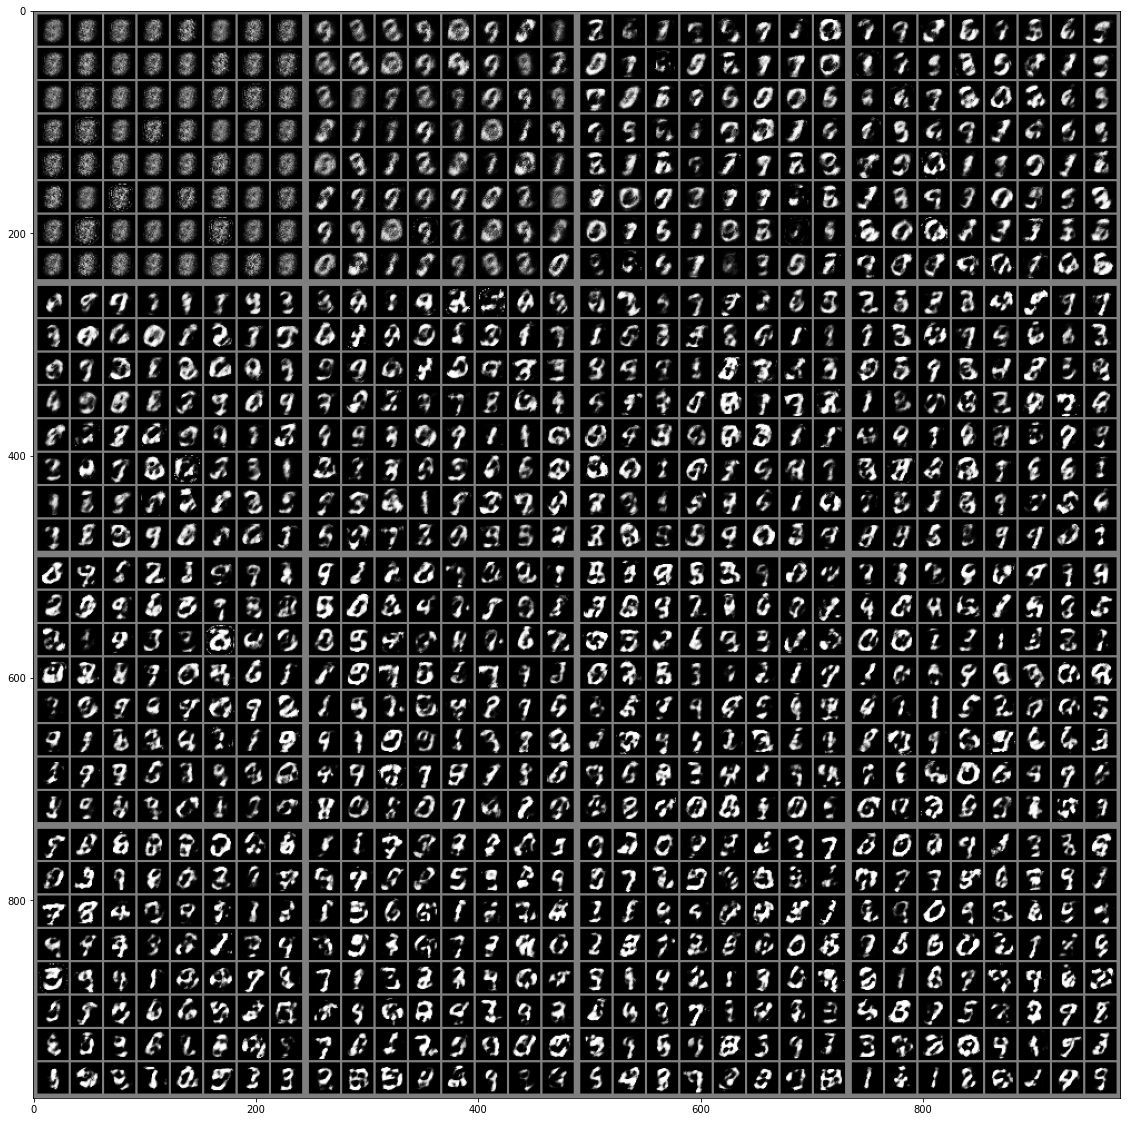

In [6]:
import torchvision
tmp = []
for i in range(progress.shape[0]):
    img = torchvision.utils.make_grid(torch.FloatTensor(progress[i]))
    #img = img.permute(1,2,0)
    tmp.append(img)
tmp = torch.stack(tmp)
img = torchvision.utils.make_grid(tmp, nrow=4).numpy().transpose(1,2,0)
print(img.shape)
std = [0.5,0.5,0.5] 
mean = [0.5,0.5,0.5] 
img = img*std +mean

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(img)
plt.show()

(27520,) (27520,)


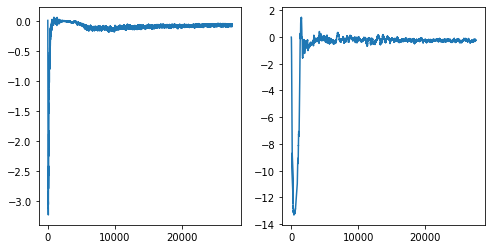

In [7]:
loss_C = np.array(loss_C)
loss_G = np.array(loss_G)
print(loss_C.shape, loss_G.shape)
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.plot(loss_C)
ax = fig.add_subplot(122)
ax.plot(loss_G)
plt.show()